In [118]:
import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import time
import pymysql
import json
import seaborn as sns
from datetime import datetime
from math import pi
import matplotlib.pyplot as plt

In [90]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['font.size'] = 14

In [2]:
now_date = datetime.today().strftime("%Y%m%d")
print(now_date)
url = 'https://www.koreabaseball.com/ws/Main.asmx/GetKboGameList'
data = {'leId': 1, 'srId': '0,1,3,4,5,7,8,9','date':now_date} 

20200716


In [3]:
res = requests.post(url, data=data)
today_game = res.json()
# print(today_game)
today_dict = {}
# HOME_NM : 홈 팀명
# AWAY_NM : 원장 팀명
# T_PIT_P_ID : 홈 선발투수 ID
# B_PIT_P_ID : 원정 선발투수 ID

for i,game in enumerate(today_game['game']):
    data={}
    data['H_NM'] = game['HOME_NM']
    data['A_NM'] = game['AWAY_NM']
    data['H_P_ID'] = game['T_PIT_P_ID']
    data['A_P_ID'] = game['B_PIT_P_ID']
    today_dict[i] = data


In [5]:
today_dict

{0: {'H_NM': '두산', 'A_NM': 'SK', 'H_P_ID': 69839, 'A_P_ID': 50234},
 1: {'H_NM': '롯데', 'A_NM': 'LG', 'H_P_ID': 78148, 'A_P_ID': 76355},
 2: {'H_NM': '삼성', 'A_NM': 'KIA', 'H_P_ID': 77637, 'A_P_ID': 50449},
 3: {'H_NM': 'KT', 'A_NM': '한화', 'H_P_ID': 65764, 'A_P_ID': 69032},
 4: {'H_NM': '키움', 'A_NM': 'NC', 'H_P_ID': 69940, 'A_P_ID': 60336}}

In [24]:
home = today_dict[0]['H_NM']
away = today_dict[0]['A_NM']

In [15]:
url = 'https://www.koreabaseball.com/Record/Team/Hitter/Basic1.aspx'

In [16]:
df = pd.read_html(url,header=0)
df = df[0]

In [148]:
#AVG R H HR RBI
df_team = df[(df['팀명'] == home) | (df['팀명'] == away)][['팀명','AVG','R','H','2B','3B','HR']]

In [149]:
df_team.columns = [['팀명','타율','득점','안타','2루타','3루타','홈런']]
df_team['타율'] = df_team['타율'] * 1000


In [151]:
df_team.set_index('팀명',inplace=True)

In [153]:
var1 =  df_team.iloc[0,1:].to_list()
var1 += var1[:1]
var101 = []
for num in var1:
    var101.append(num/10)
print(var101)

[37.5, 65.1, 11.3, 1.0, 6.1, 37.5]


In [104]:
# df_team
var2 =  df_team.iloc[1,1:].to_list()
var2+= var2[:1]
var102 = []
for num in var2:
    var102.append(num/10)
print(var102)

[24.3, 23.3, 49.8, 6.2, 1.0, 5.2, 24.3]


In [88]:
var = ['타율','득점','안타','2루타','3루타','홈런']
num_var = len(var)
deg = [n/float(num_var) * 2 * pi for n in range(num_var)]
deg += deg[:1]
print(deg)

[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989, 0.0]


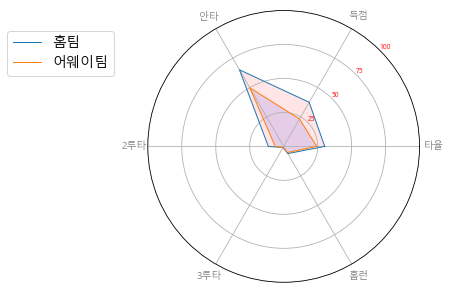

In [108]:
ax = plt.subplot(111,polar=True)
plt.xticks(deg[:-1],var,color='grey',size=10)

ax.set_rlabel_position(45)
plt.yticks([25,50,75,100],['25','50','75','100'],color='red',size=7)
plt.ylim(0,100)

ax.plot(deg,var101,linewidth=1,linestyle='solid',label='홈팀')
ax.fill(deg,var101,'red',alpha=0.1)

ax.plot(deg,var102,linewidth=1,linestyle='solid',label='어웨이팀')
ax.fill(deg,var102,'blue',alpha=0.1)

plt.legend(loc='best',bbox_to_anchor=(-0.1,0.95))

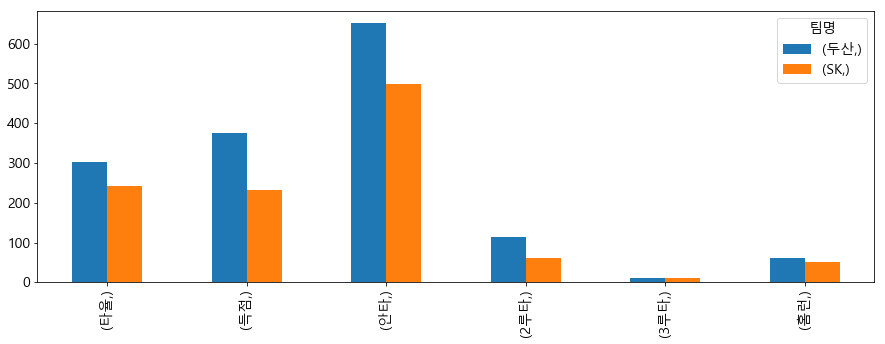

In [154]:
df_t = df_team.T
df_t.plot(kind='bar')
# plt.barh(,df_team)